In [1]:
!git clone https://github.com/Pavun-KumarCH/Pipe-Inventory-Management-Yolo-v8.git

Cloning into 'Pipe-Inventory-Management-Yolo-v8'...
remote: Enumerating objects: 921, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 921 (delta 0), reused 5 (delta 0), pack-reused 916 (from 1)
Receiving objects: 100% (921/921), 57.33 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (911/911), done.


In [2]:
cd "Pipe-Inventory-Management-Yolo-v8"

/content/Pipe-Inventory-Management-Yolo-v8


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [14]:
import os
import numpy as np
from roboflow import Roboflow
from ultralytics import YOLO

from google.colab import userdata
API_KEY = userdata.get('Roboflow')

In [7]:
rf = Roboflow(api_key = API_KEY)

project = rf.workspace("multipipedetection").project("pipe-classification")

loading Roboflow workspace...
loading Roboflow project...


In [8]:
# Loading the dataset
data = project.version(15).download('yolov8')

Dependency ultralytics==8.0.196 is required but found version=8.2.76, to fix: `pip install ultralytics==8.0.196`


In [9]:
os.getcwd()

'/content/Pipe-Inventory-Management-Yolo-v8'

In [10]:
#@title Training The Model
if __name__ == "__main__":

    # Initialize YOLOv8 model
    model = YOLO("yolov8n.yaml")
    model = YOLO("yolov8n.pt")

    # Set batch size and image size
    batch_size = 5 # adjust as needed
    image_size = 320 # adjust as needed

    # Training the model
    results = model.train(data = "/content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/data.yaml",
                          epochs = 25,
                          batch = batch_size,
                          imgsz = image_size)
  ### NOTE {runtime-error}  : Change data.yaml file with proper current directory fro train, test, validation

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/data.yaml, epochs=25, time=None, patience=100, batch=5, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

100%|██████████| 755k/755k [00:00<00:00, 102MB/s]


Overriding model.yaml nc=80 with nc=22

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/labels... 373 images, 0 backgrounds, 0 corrupt: 100%|██████████| 373/373 [00:05<00:00, 62.33it/s]

train: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/images/b-23-_jpg.rf.e6a6cec5bf783befa6188338fb769b82.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/images/b-26-_jpg.rf.9c5337bbdce34a21ce5e7add8be2d21c.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/images/b-6-_jpg.rf.73a1196a05b5699851d5495c16ea3bcb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/images/c-10-_jpg.rf.a07d87a944b629a31af9213cb1139910.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/images/c-4-_jpg.rf.8bd3a390ee434c28351877373d4be4bf.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/images/c-40-_jpg.rf.ec4f4f1bd3f

train: New cache created: /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 236798, len(boxes) = 237094. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/valid/labels... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 53.54it/s]

val: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/valid/images/k-13-_jpg.rf.7aab9c4fa45d1c38ef90bf9938e00e26.jpg: 17 duplicate labels removed


val: New cache created: /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000385, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       3.4G      3.589      5.049      1.401       1508        320: 100%|██████████| 75/75 [01:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]

                   all         35      30404          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.59G      3.113      4.699      1.125       1326        320: 100%|██████████| 75/75 [00:08<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         35      30404      0.881     0.0332     0.0367     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.43G      3.058      4.376      1.079       1677        320: 100%|██████████| 75/75 [00:10<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


                   all         35      30404      0.953      0.088     0.0954     0.0535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.79G      2.882      4.139      1.036       1468        320: 100%|██████████| 75/75 [00:10<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all         35      30404      0.871      0.116      0.136     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.13G      2.867      3.983      1.023        863        320: 100%|██████████| 75/75 [00:10<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         35      30404      0.101      0.146      0.151     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.87G      2.742      3.832      1.001       1609        320: 100%|██████████| 75/75 [00:09<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all         35      30404      0.738      0.113      0.169     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       2.7G      2.662      3.699     0.9821       2312        320: 100%|██████████| 75/75 [00:08<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all         35      30404      0.822      0.132      0.172      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.02G      2.597      3.658     0.9682        482        320: 100%|██████████| 75/75 [00:09<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all         35      30404       0.61      0.138      0.182     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.21G      2.499      3.499     0.9707       2229        320: 100%|██████████| 75/75 [00:09<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all         35      30404      0.462      0.148      0.198      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.11G      2.438      3.388      0.956        993        320: 100%|██████████| 75/75 [00:10<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all         35      30404        0.5      0.155      0.227      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.12G      2.365      3.265     0.9495       2437        320: 100%|██████████| 75/75 [00:10<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all         35      30404      0.599      0.157      0.208      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.76G       2.39      3.211     0.9414       2881        320: 100%|██████████| 75/75 [00:09<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all         35      30404      0.539      0.176      0.221      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.28G      2.384      3.144     0.9362       3179        320: 100%|██████████| 75/75 [00:08<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         35      30404      0.557       0.18      0.245      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.15G      2.322      3.086     0.9318       3028        320: 100%|██████████| 75/75 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         35      30404      0.558      0.187      0.244      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.24G      2.289      3.007     0.9328       2089        320: 100%|██████████| 75/75 [00:10<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         35      30404      0.652      0.193      0.284      0.173


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.87G      2.224      2.995     0.9268       1858        320: 100%|██████████| 75/75 [00:43<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all         35      30404      0.609      0.182      0.253      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      1.99G      2.172       2.94     0.9292       1627        320: 100%|██████████| 75/75 [00:08<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all         35      30404      0.587      0.183      0.267      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.52G      2.198      2.924     0.9227       1477        320: 100%|██████████| 75/75 [00:07<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all         35      30404      0.523      0.178      0.254      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.44G      2.146      2.871     0.9219       2125        320: 100%|██████████| 75/75 [00:09<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         35      30404      0.618       0.17      0.271      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       2.1G      2.099      2.799     0.9178       1098        320: 100%|██████████| 75/75 [00:09<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all         35      30404      0.631      0.173      0.275      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.34G      2.123      2.811      0.921        716        320: 100%|██████████| 75/75 [00:09<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all         35      30404      0.578      0.178      0.286      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.72G      2.058       2.74     0.9142        485        320: 100%|██████████| 75/75 [00:07<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         35      30404       0.54      0.187      0.283      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      1.91G      2.105      2.689      0.912       2148        320: 100%|██████████| 75/75 [00:08<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all         35      30404      0.677      0.179      0.294      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.44G      2.042      2.738     0.9117       2377        320: 100%|██████████| 75/75 [00:09<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all         35      30404      0.511      0.206      0.276      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.79G      2.027      2.719      0.916       3126        320: 100%|██████████| 75/75 [00:09<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all         35      30404      0.578      0.187      0.285       0.18



25 epochs completed in 0.114 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,938 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.64s/it]


                   all         35      30404      0.578      0.187      0.285      0.179
              C 48 2.5          2        915      0.507      0.183      0.307      0.128
              C 48 3.2          2       2578          1          0      0.105     0.0355
              C 60 3.2          1          1          1          0          0          0
              C 89 3.6          2        164      0.698      0.466      0.688      0.487
           R 20 40 1.2          8       9683      0.827      0.205      0.432      0.206
           R 20 40 2.5          4        786          0          0          0          0
             R 60 40 2          4       1244          0          0          0          0
             R 80 40 2          9       5731      0.872     0.0881      0.413      0.242
           R 80 40 2.5          5        279          0          0          0          0
           R 80 40 2.9          1         77      0.755      0.792      0.829      0.555
           R 96 48 2.

In [47]:
#@title Evaluationg the Model
from sklearn.metrics import precision_recall_curve, confusion_matrix

results_val = model.val(data = "/content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/data.yaml", imgsz = image_size)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/valid/images/k-13-_jpg.rf.7aab9c4fa45d1c38ef90bf9938e00e26.jpg: 17 duplicate labels removed



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.43s/it]


                   all         35      30404      0.578      0.187      0.285       0.18
              C 48 2.5          2        915      0.512      0.183      0.309      0.128
              C 48 3.2          2       2578          1          0      0.105     0.0355
              C 60 3.2          1          1          1          0          0          0
              C 89 3.6          2        164      0.697      0.462      0.691       0.49
           R 20 40 1.2          8       9683      0.826      0.205      0.433      0.208
           R 20 40 2.5          4        786          0          0          0          0
             R 60 40 2          4       1244          0          0          0          0
             R 80 40 2          9       5731      0.875     0.0865      0.415      0.243
           R 80 40 2.5          5        279          0          0          0          0
           R 80 40 2.9          1         77      0.762      0.792      0.829      0.559
           R 96 48 2.

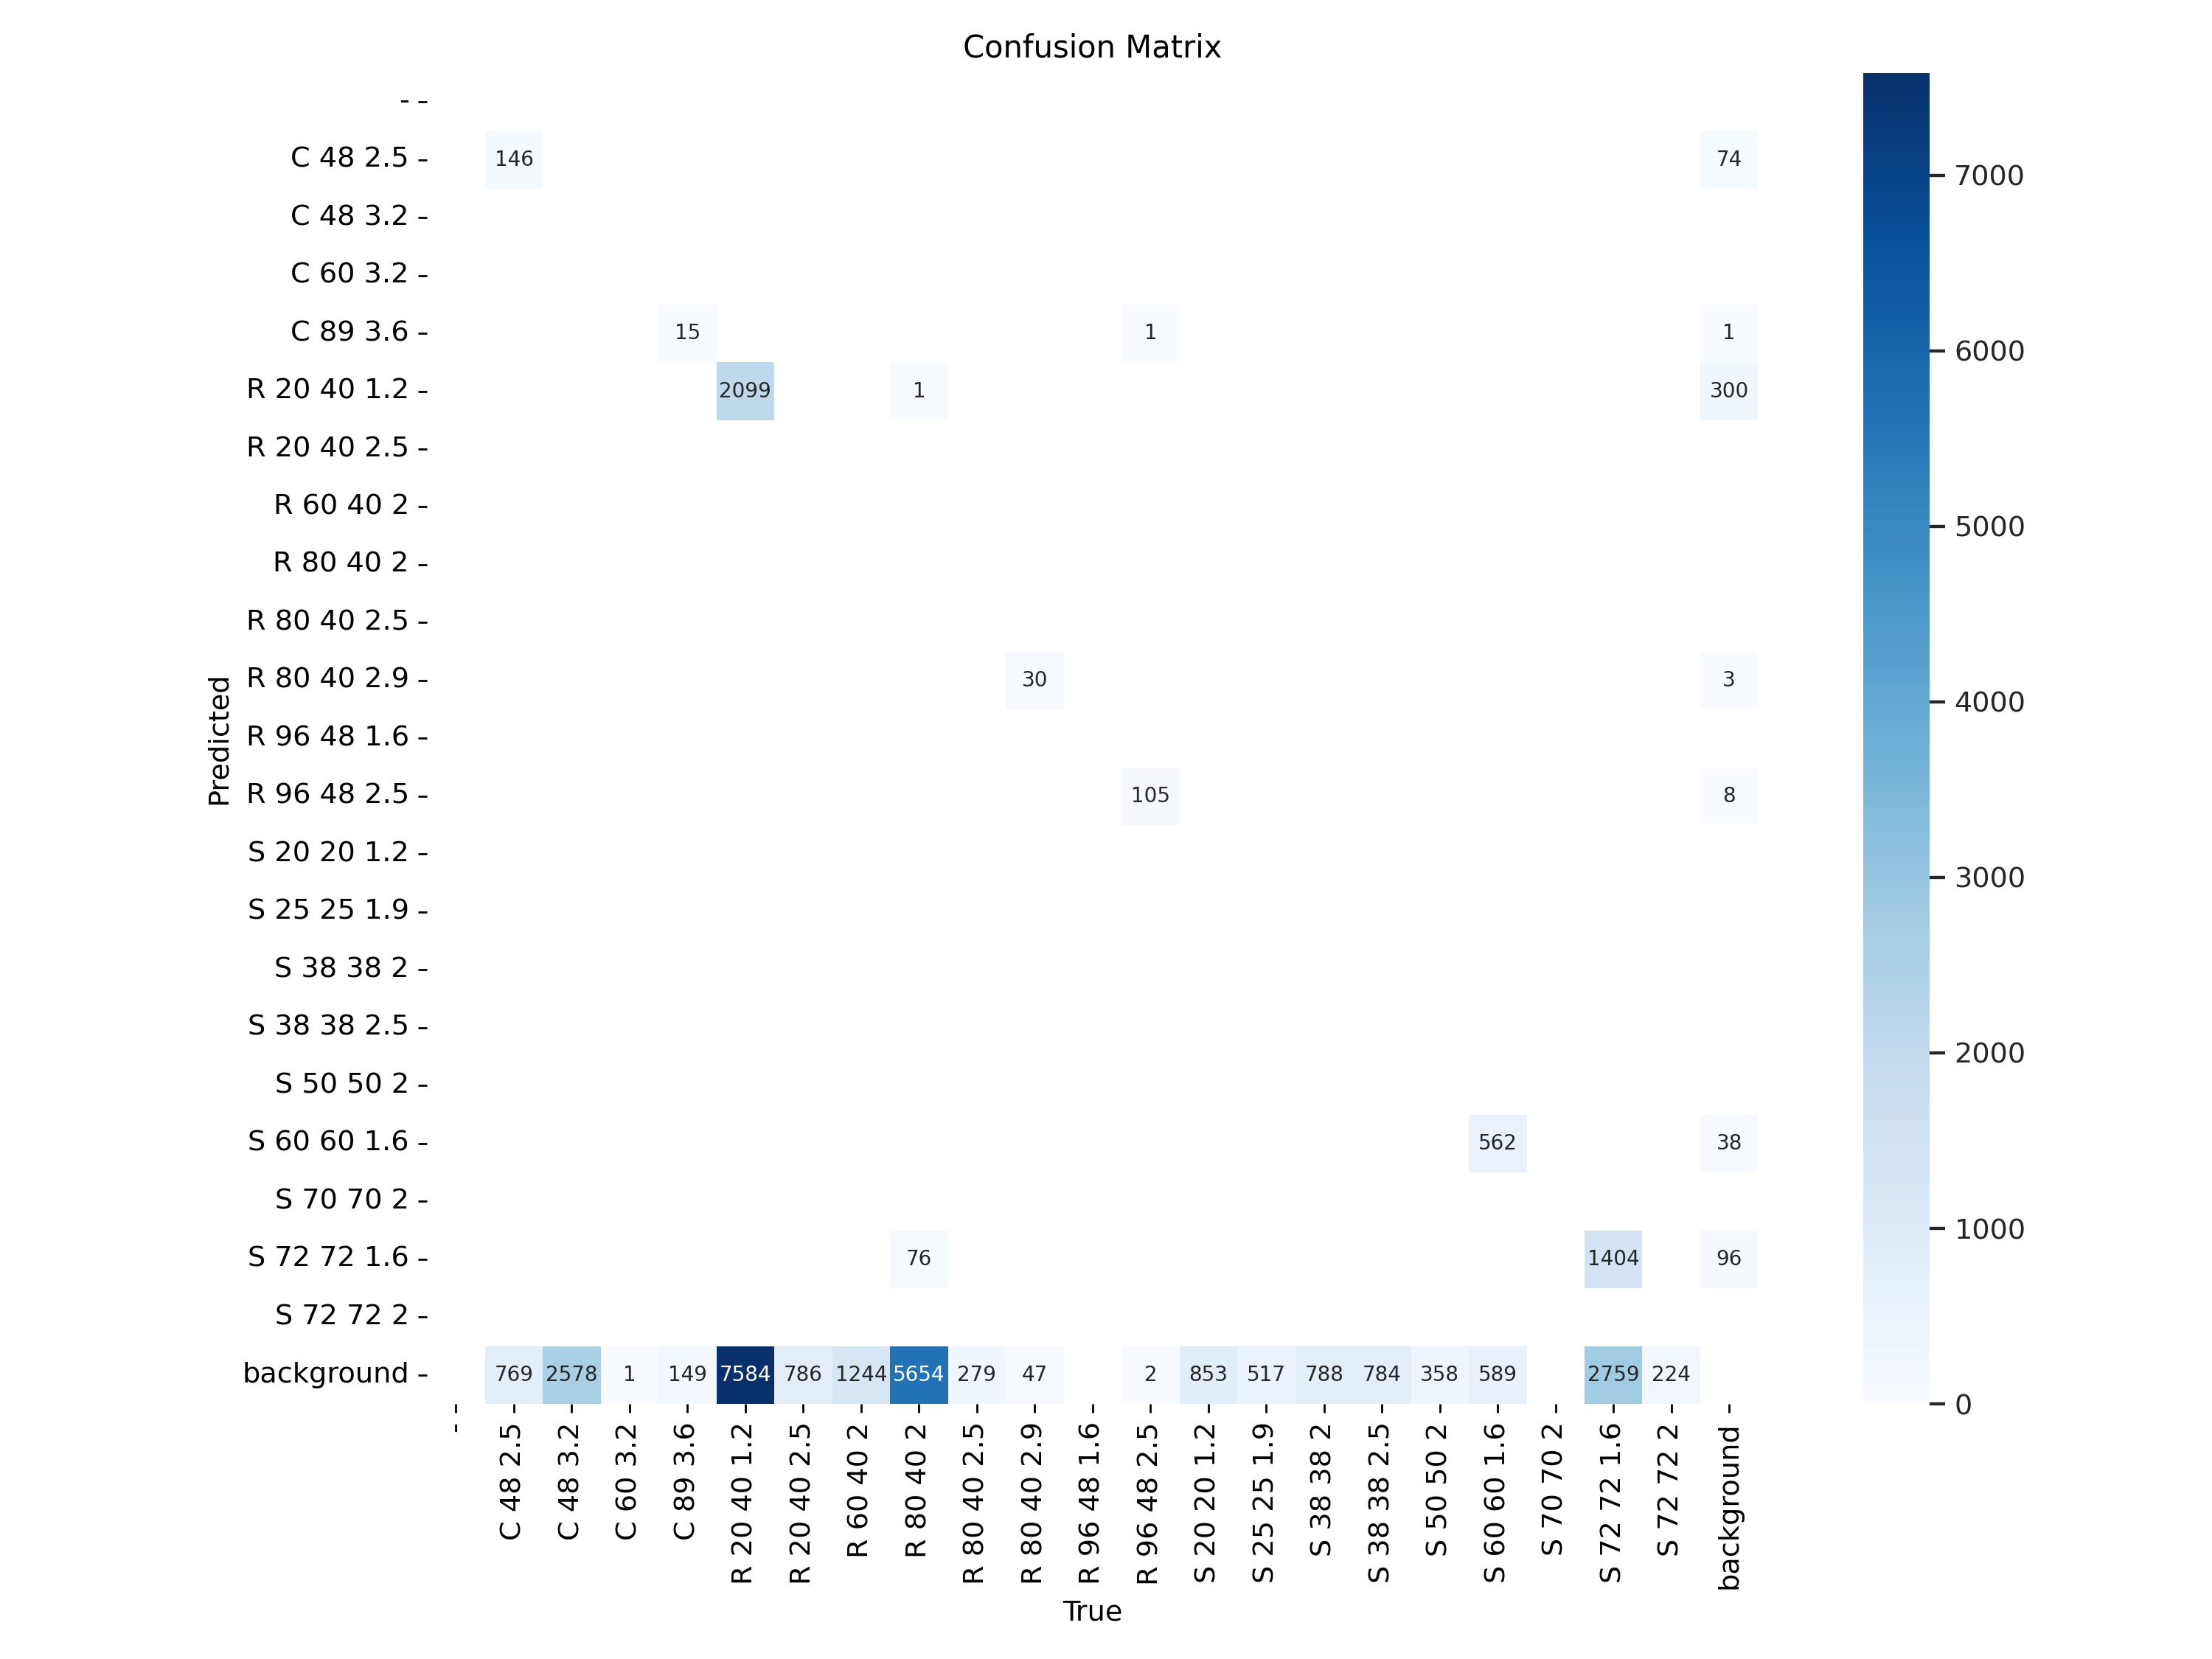

In [50]:
#@title Display the Confusion Matrix Image
from IPython.display import display, Image

# Display the confusion matrix image
display(Image(filename='/content/Pipe-Inventory-Management-Yolo-v8/runs/detect/val/confusion_matrix.png'))


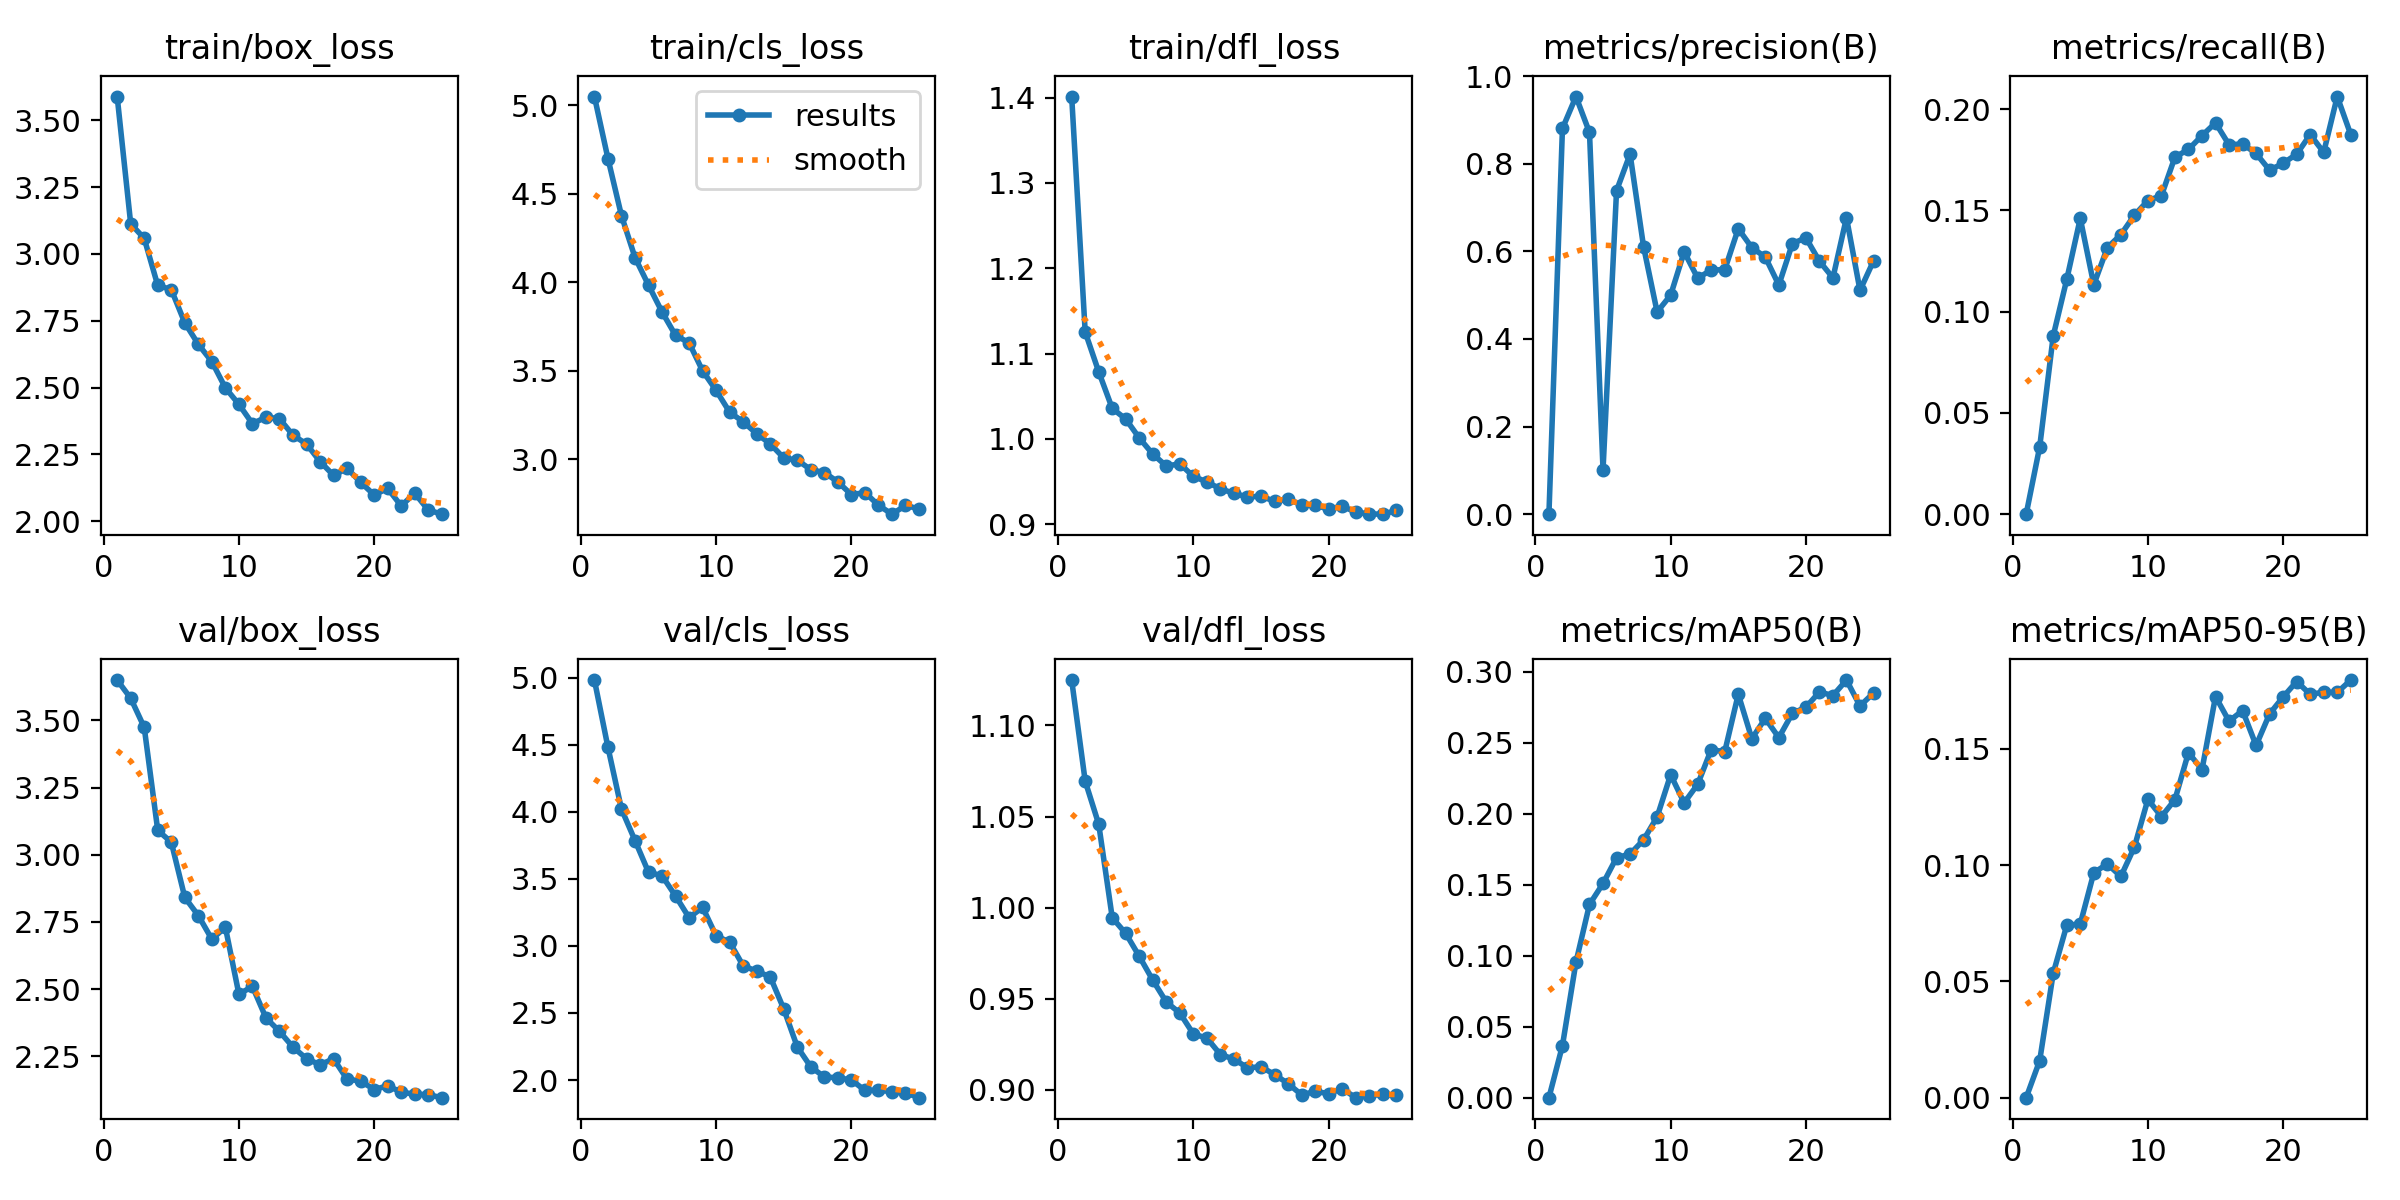

In [28]:
display(Image(filename='/content/Pipe-Inventory-Management-Yolo-v8/runs/detect/train/results.png'))


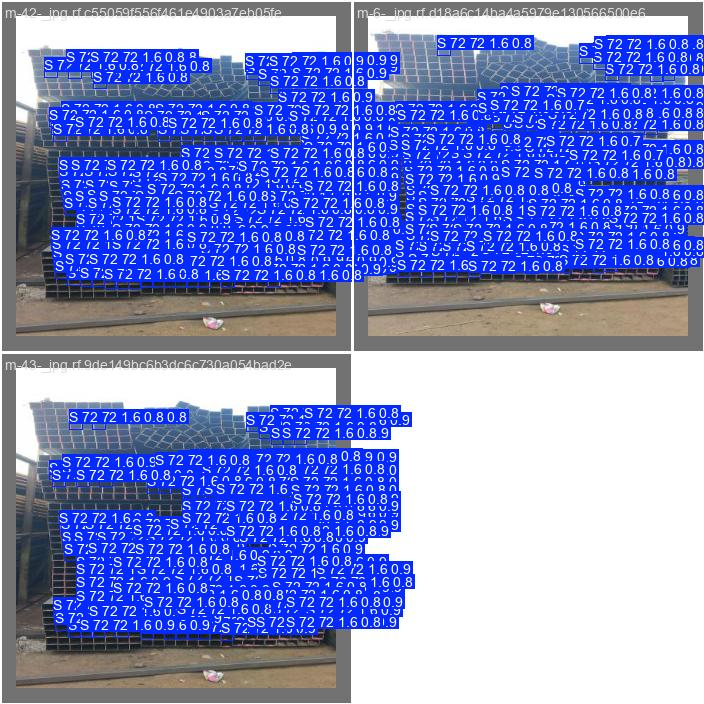

In [54]:
display(Image(filename='/content/Pipe-Inventory-Management-Yolo-v8/runs/detect/val/val_batch2_pred.jpg'))


image 1/1 /content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/valid/images/d-47-_jpg.rf.e25fa28b2cd1c9dc7447875d872a8384.jpg: 320x320 300 S 60 60 1.6s, 26.5ms
Speed: 1.5ms preprocess, 26.5ms inference, 7.3ms postprocess per image at shape (1, 3, 320, 320)


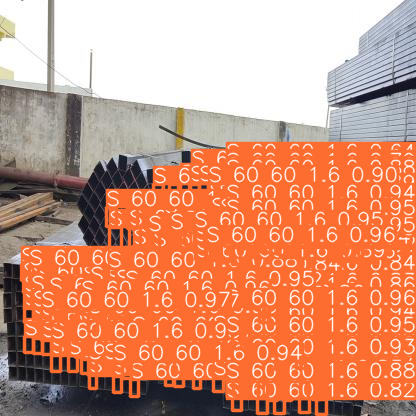

In [56]:

import os
import random
from ultralytics import YOLO
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# pick random picture
dir = '/content/Pipe-Inventory-Management-Yolo-v8/Pipe--classification-15/valid/images'
filename = random.choice(os.listdir(dir))
path = os.path.join(dir, filename)

# load best model
model = YOLO('/content/Pipe-Inventory-Management-Yolo-v8/runs/detect/train/weights/best.pt')

# predict
results = model.predict(source=path, save=False,  conf=0.5)

# show result
res_plotted = results[0].plot()
cv2_imshow(res_plotted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
%cd /content/Pipe-Inventory-Management-Yolo-v8


/content/Pipe-Inventory-Management-Yolo-v8
